In [1]:
import pandas as pd
import json
import numpy as np
import os
import csv

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
main_path = "../data/"

## Load Data

In [5]:
#result recommender with only purchase as action products
res_p = pd.read_json(os.path.join(main_path,"results/predictions-ecommerce-purchase.json"))
##result recommender with purchase (main action) and view on products
res_pv = pd.read_json(os.path.join(main_path, "results/predictions-ecommerce-purchase-view-cat.json"))
res_pvc = pd.read_json(os.path.join(main_path, "results/predictions-ecommerce-purchase-view-cat-cart.json"))

#### Train data

In [10]:
cols = ["event_time","event_type","product_id","category_id","category_code","brand",
       "price","user_id"]
train_p = pd.read_csv(os.path.join(main_path,"input_data/2019-Nov-sample-train-purch.csv"),
                     names = cols)
train_pv = pd.read_csv(os.path.join(main_path,"input_data/2019-Nov-sample-train-purch-view.csv"),
                     names = cols)
train_pvc = pd.read_csv(os.path.join(main_path,"input_data/2019-Nov-sample-train-purch-view-cart.csv"),
                     names = cols)


In [11]:
test = pd.read_csv(os.path.join(main_path,"input_data/2019-Nov-sample-test-purch.csv"),
                     names = cols)

In [12]:
nr_users = len(test["user_id"])

## Prepare results

In [13]:
def extract_rec(df_res):
    df_res.loc[:, "result_items"] = df_res.loc[:,"result"].apply(lambda x: [int(i["item"]) for i in x],1)
    df_res.loc[:, "result_scores"] = df_res.loc[:,"result"].apply(lambda x: [i["score"] for i in x],1)
    df_res.loc[:, "result_length"] = df_res.loc[:, "result"].apply(lambda x: len(x))
    return df_res

res_p = extract_rec(res_p)
res_pv = extract_rec(res_pv)
res_pvc = extract_rec(res_pvc)

# Evaluate recommenders

### Users without recommendation (?)

In [14]:
no_rec_p = res_p[res_p["result_length"]==0]

print("RECOMMENDER WITH PURCHASE\n")
print("Nr. of users with no recommendations: {}".format(len(no_rec_p)))

RECOMMENDER WITH PURCHASE

Nr. of users with no recommendations: 192


In [15]:
#take a user with no rec (512383098) and his/her products
prods = list(train_p[train_p["user_id"]==512383098]["product_id"])
train_p[train_p["product_id"].isin(prods)] #the products purchased have no co-correlations with other products

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
27066,2019-11-09 11:22:18+00:00,purchase,100000320,2125175529001713727,NaN,mtx,84.64,512383098
27067,2019-11-11 14:48:57+00:00,purchase,51000006,2134905044766557181,appliances.environment.vacuum,kolner,86.23,512383098
27068,2019-11-13 05:02:31+00:00,purchase,19200020,2053013556202308035,construction.tools.saw,huter,104.74,512383098
27069,2019-11-14 08:53:18+00:00,purchase,41000028,2125175529001713727,NaN,alteco,169.99,512383098


In [16]:
print("RECOMMENDER WITH PURCHASE AND CATEGORY VIEW\n")
print("Nr. of users with no recommendations: {}".format(len(res_pv[res_pv["result_length"]==0])))

RECOMMENDER WITH PURCHASE AND CATEGORY VIEW

Nr. of users with no recommendations: 0


In [17]:
train_pv[train_pv["user_id"]==512383098] # in this case we have much more interactions

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
27066,2019-11-09 11:22:18+00:00,purchase,100000320,2125175529001713727,NaN,mtx,84.64,512383098
27067,2019-11-11 14:48:57+00:00,purchase,51000006,2134905044766557181,appliances.environment.vacuum,kolner,86.23,512383098
27068,2019-11-13 05:02:31+00:00,purchase,19200020,2053013556202308035,construction.tools.saw,huter,104.74,512383098
27069,2019-11-14 08:53:18+00:00,purchase,41000028,2125175529001713727,NaN,alteco,169.99,512383098
315675,2019-11-01 13:48:46 UTC,view,12500207,2053013556277805513,NaN,NaN,23.14,512383098
315676,2019-11-01 13:49:30 UTC,view,42800011,2096280510920655375,construction.tools.saw,metabo,208.30,512383098
315678,2019-11-01 13:51:26 UTC,view,48500022,2116907507954745551,NaN,alteco,73.88,512383098
315680,2019-11-01 13:53:14 UTC,view,41000003,2125175529001713727,NaN,NaN,199.49,512383098
315684,2019-11-06 14:48:38 UTC,view,30000054,2127425436764865054,construction.tools.welding,NaN,100.36,512383098
315687,2019-11-07 04:31:56 UTC,view,27700051,2053013560086233771,construction.tools.pump,NaN,27.54,512383098


In [18]:
no_rec_pvc = res_pvc[res_pvc["result_length"]==0]

print("RECOMMENDER WITH PURCHASE, CART AND CATEGORY VIEW\n")
print("Nr. of users with no recommendations: {}".format(len(no_rec_pvc)))

RECOMMENDER WITH PURCHASE, CART AND CATEGORY VIEW

Nr. of users with no recommendations: 0


In [19]:
train_pvc[train_pvc["user_id"]==512383098] # in this case we have much more interactions

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
27066,2019-11-09 11:22:18+00:00,purchase,100000320,2125175529001713727,NaN,mtx,84.64,512383098
27067,2019-11-11 14:48:57+00:00,purchase,51000006,2134905044766557181,appliances.environment.vacuum,kolner,86.23,512383098
27068,2019-11-13 05:02:31+00:00,purchase,19200020,2053013556202308035,construction.tools.saw,huter,104.74,512383098
27069,2019-11-14 08:53:18+00:00,purchase,41000028,2125175529001713727,NaN,alteco,169.99,512383098
315675,2019-11-01 13:48:46 UTC,view,12500207,2053013556277805513,NaN,NaN,23.14,512383098
315676,2019-11-01 13:49:30 UTC,view,42800011,2096280510920655375,construction.tools.saw,metabo,208.30,512383098
315678,2019-11-01 13:51:26 UTC,view,48500022,2116907507954745551,NaN,alteco,73.88,512383098
315680,2019-11-01 13:53:14 UTC,view,41000003,2125175529001713727,NaN,NaN,199.49,512383098
315684,2019-11-06 14:48:38 UTC,view,30000054,2127425436764865054,construction.tools.welding,NaN,100.36,512383098
315687,2019-11-07 04:31:56 UTC,view,27700051,2053013560086233771,construction.tools.pump,NaN,27.54,512383098


### Distribution of users by nr of recommended products

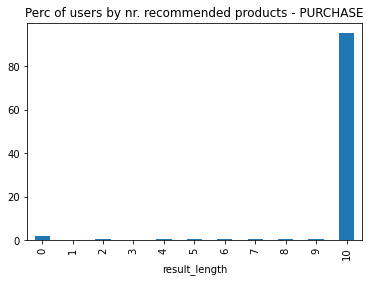

In [20]:
(res_p.groupby("result_length").size()*100/nr_users).plot(kind="bar", title="Perc of users by nr. recommended products - PURCHASE")
plt.show()

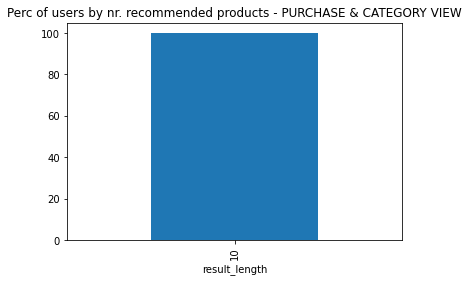

In [21]:
(res_pv.groupby("result_length").size()*100/nr_users).plot(kind="bar", title="Perc of users by nr. recommended products - PURCHASE & CATEGORY VIEW")
plt.show()

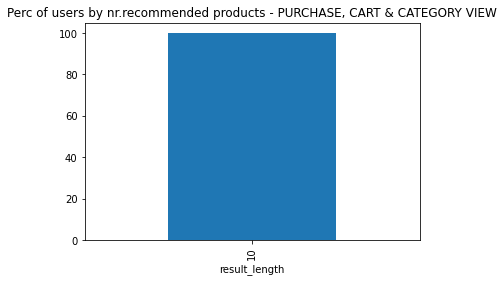

In [22]:
(res_pvc.groupby("result_length").size()*100/nr_users).plot(kind="bar", 
                                                           title="Perc of users by nr." \
                                                           "recommended products - PURCHASE, CART & CATEGORY VIEW")
plt.show()

### Consider how many user-product in test set were recommended

In [23]:
test_p = test.merge(res_p, on="user_id", how="inner")
test_pv = test.merge(res_pv, on="user_id", how="inner")
test_pvc = test.merge(res_pvc, on="user_id", how="inner")

In [24]:
print("RECOMMENDER WITH PURCHASE\n")

rec_prod_p = test_p[test_p.apply(lambda row: row["product_id"] in row["result_items"],1) == True]


print("Nr. of users tested: {}".format(nr_users))
print("(Max) Nr. recommended items: {}".format(np.max(test_p["result_length"])))
print("Nr. of users where test item is recommended: {}".format(len(rec_prod_p)))

RECOMMENDER WITH PURCHASE

Nr. of users tested: 10000
(Max) Nr. recommended items: 10
Nr. of users where test item is recommended: 1129


In [25]:
print("RECOMMENDER WITH PURCHASE AND CATEGORY VIEW\n")

rec_prod_pv = test_pv[test_pv.apply(lambda row: row["product_id"] in row["result_items"],1) == True]

print("Nr. of users tested: {}".format(nr_users))
print("(Max) Nr. recommended items: {}".format(np.max(test_pv["result_length"])))
print("Nr. of users where test item is recommended: {}".format(len(rec_prod_pv)))

RECOMMENDER WITH PURCHASE AND CATEGORY VIEW

Nr. of users tested: 10000
(Max) Nr. recommended items: 10
Nr. of users where test item is recommended: 667


In [26]:
print("RECOMMENDER WITH PURCHASE, CART AND CATEGORY VIEW\n")

rec_prod_pvc = test_pvc[test_pvc.apply(lambda row: row["product_id"] in row["result_items"],1) == True]

print("Nr. of users tested: {}".format(nr_users))
print("(Max) Nr. recommended items: {}".format(np.max(test_pvc["result_length"])))
print("Nr. of users where test item is recommended: {}".format(len(rec_prod_pvc)))

RECOMMENDER WITH PURCHASE, CART AND CATEGORY VIEW

Nr. of users tested: 10000
(Max) Nr. recommended items: 10
Nr. of users where test item is recommended: 1026


It looks like adding category-view as secondary action does not help the recommender to find the right purchased items. This interaction is probably too "generic" and adds noise to the recommender.

## Analysis on differences between first and second recommender

In [27]:
# take a user for which recommendation was good for first recommender and bad for second

In [28]:
(test.groupby("category_code").size()/len(test)).sort_values(ascending=False)

category_code
electronics.smartphone         0.4877
electronics.audio.headphone    0.0425
electronics.video.tv           0.0418
electronics.clocks             0.0341
computers.notebook             0.0294
                                ...  
apparel.trousers               0.0001
country_yard.lawn_mower        0.0001
appliances.environment.fan     0.0001
construction.tools.painting    0.0001
apparel.sock                   0.0001
Length: 109, dtype: float64

In [29]:
only_first = rec_prod_p.merge(rec_prod_pv[["product_id","user_id","result_items"]], on=["product_id","user_id"], how="left")
only_first = only_first[only_first["result_items_y"].isnull()]

In [30]:
(only_first.groupby("category_code").size()/len(only_first)).sort_values(ascending=False)

category_code
electronics.smartphone                    0.847619
electronics.video.tv                      0.025397
electronics.audio.headphone               0.023810
electronics.clocks                        0.015873
appliances.kitchen.washer                 0.012698
computers.components.cpu                  0.003175
furniture.living_room.cabinet             0.003175
furniture.kitchen.chair                   0.003175
furniture.bedroom.bed                     0.003175
construction.tools.drill                  0.003175
computers.notebook                        0.003175
kids.toys                                 0.003175
appliances.kitchen.refrigerators          0.003175
appliances.environment.vacuum             0.003175
appliances.kitchen.kettle                 0.003175
appliances.kitchen.mixer                  0.003175
appliances.kitchen.microwave              0.001587
kids.carriage                             0.001587
appliances.environment.air_conditioner    0.001587
appliances.iron  

In [31]:
only_first.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,result,result_items_x,result_scores,result_length,result_items_y
0,2019-11-16 10:40:33 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,512363921,"[{'item': '1003706', 'score': 18.1800270080566...","[1003706, 3300323, 1004891, 16400012, 26600061...","[18.18002700805664, 16.550067901611328, 16.550...",10,NaN
6,2019-11-01 09:29:52 UTC,purchase,1004870,2053013555631882655,electronics.smartphone,samsung,272.83,512416095,"[{'item': '1801785', 'score': 44.4715080261230...","[1801785, 1004870, 1005014, 6200324, 28718041,...","[44.47150802612305, 41.10997009277344, 40.0627...",10,NaN
8,2019-11-01 10:30:46 UTC,purchase,1005115,2053013555631882655,electronics.smartphone,apple,945.04,512417593,"[{'item': '1004659', 'score': 29.9725189208984...","[1004659, 1005115, 1004873, 1005186, 1005137, ...","[29.972518920898438, 22.871564865112305, 22.87...",10,NaN
9,2019-11-03 05:41:17 UTC,purchase,1004750,2053013555631882655,electronics.smartphone,samsung,195.01,512423872,"[{'item': '1004767', 'score': 14.8379602432250...","[1004767, 1002544, 1004870, 1005100, 1004836, ...","[14.837960243225098, 14.837960243225098, 14.83...",10,NaN
13,2019-11-01 05:50:35 UTC,purchase,1004833,2053013555631882655,electronics.smartphone,samsung,172.23,512445529,"[{'item': '1004856', 'score': 20.2361316680908...","[1004856, 1004833, 1002544, 1005100, 1004750, ...","[20.23613166809082, 20.23613166809082, 20.2361...",10,NaN


In [32]:
ex_user = 512416095
train_p[train_p["user_id"]==ex_user]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
18941,2019-11-02 08:23:13+00:00,purchase,25900001,2053013563718501229,computers.components.cooler,ecocool,72.31,512416095
18942,2019-11-02 16:14:19+00:00,purchase,1801690,2053013554415534427,electronics.video.tv,samsung,369.45,512416095
18943,2019-11-07 11:14:05+00:00,purchase,1801704,2053013554415534427,electronics.video.tv,samsung,432.94,512416095
18944,2019-11-10 18:25:03+00:00,purchase,1801623,2053013554415534427,electronics.video.tv,lg,372.47,512416095
18945,2019-11-11 15:01:46+00:00,purchase,25900023,2053013563718501229,computers.components.cooler,almacom,63.39,512416095
18946,2019-11-13 09:51:47+00:00,purchase,1004873,2053013555631882655,electronics.smartphone,samsung,350.05,512416095
18947,2019-11-17 15:23:43+00:00,purchase,1004833,2053013555631882655,electronics.smartphone,samsung,179.15,512416095
18948,2019-11-18 08:41:23+00:00,purchase,1002544,2053013555631882655,electronics.smartphone,apple,493.84,512416095
18949,2019-11-19 06:53:56+00:00,purchase,1004836,2053013555631882655,electronics.smartphone,samsung,229.91,512416095
18950,2019-11-24 05:54:55+00:00,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,246.96,512416095


In [33]:
train_pv[(train_pv["user_id"]==ex_user) & (train_pv["event_type"]=="view")].groupby("category_code").size()

category_code
appliances.environment.vacuum    1
appliances.iron                  1
computers.components.cooler      1
electronics.clocks               1
electronics.smartphone           1
electronics.video.tv             1
furniture.living_room.cabinet    1
dtype: int64

In [34]:
test[test["user_id"] == ex_user]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
99,2019-11-01 09:29:52 UTC,purchase,1004870,2053013555631882655,electronics.smartphone,samsung,272.83,512416095


In [35]:
#what kind of products were recommended by first recommender
train_p[train_p["product_id"].isin(
    test_p[test_p["user_id"]==ex_user].iloc[0]["result_items"]
)][["product_id","category_id","category_code","brand"]].drop_duplicates()

# mostly smartphones

,product_id,category_id,category_code,brand
27,1005100,2053013555631882655,electronics.smartphone,samsung
273,1004870,2053013555631882655,electronics.smartphone,samsung
300,1005014,2053013555631882655,electronics.smartphone,samsung
304,1005174,2053013555631882655,electronics.smartphone,samsung
539,15100008,2053013557024391671,NaN,bts
3693,15700176,2053013559733912211,NaN,bts
5679,28718041,2053013565069067197,apparel.shoes.keds,millionaire
10400,1801785,2053013554415534427,electronics.video.tv,lg
14737,6200324,2053013552293216471,appliances.environment.air_heater,electrolux
15312,6200260,2053013552293216471,appliances.environment.air_heater,midea


In [36]:
#what kind of products were recommended by second recommender
train_pv[train_pv["product_id"].isin(
    test_pv[test_pv["user_id"]==ex_user].iloc[0]["result_items"]
)][["product_id","category_id","category_code","brand"]].drop_duplicates()

# ??

,product_id,category_id,category_code,brand
304,1005174,2053013555631882655,electronics.smartphone,samsung
1078,1005212,2053013555631882655,electronics.smartphone,samsung
1286,5100746,2053013553375346967,NaN,huawei
5679,28718041,2053013565069067197,apparel.shoes.keds,millionaire
9391,1801712,2053013554415534427,electronics.video.tv,lg
10400,1801785,2053013554415534427,electronics.video.tv,lg
11420,1802005,2053013554415534427,electronics.video.tv,lg
14737,6200324,2053013552293216471,appliances.environment.air_heater,electrolux
15312,6200260,2053013552293216471,appliances.environment.air_heater,midea
16302,26204070,2053013563693335403,NaN,NaN


In [37]:
np.median(train_p.groupby("user_id")["category_code"].nunique()) # median of different purchase categories
# on median users purchase only in 2 different categories

2.0

In [38]:
np.median(train_pv[train_pv["event_type"]=="view"].groupby("user_id")["category_code"].nunique()) # median of different purchase categories
# on median users view 5 different categories

5.0

### Score distributions of products in test set that were recommended

The scores values will be progressively higher the more interactions we consider (see formula). Still it's interesting to see the position of the test product in the recommended items (when recommended)

In [39]:
def find_position(scores, items, product_id):
    prod_index = items.index(product_id)
    return prod_index

rec_prod_p.loc[:,"product_position"] = rec_prod_p.apply(lambda row: find_position(row["result_scores"],
                                                                            row["result_items"],
                                                                            row["product_id"]), axis=1)

rec_prod_pv.loc[:,"product_position"] = rec_prod_pv.apply(lambda row: find_position(row["result_scores"],
                                                                            row["result_items"],
                                                                            row["product_id"]), axis=1)

rec_prod_pvc.loc[:,"product_position"] = rec_prod_pvc.apply(lambda row: find_position(row["result_scores"],
                                                                            row["result_items"],
                                                                            row["product_id"]), axis=1)


/home/francesca/anaconda3/envs/universal-rec/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/francesca/anaconda3/envs/universal-rec/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


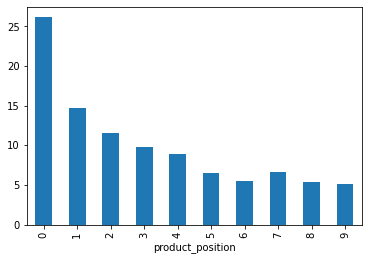

In [40]:
(rec_prod_p.groupby("product_position").size()*100/len(rec_prod_p)).plot(kind="bar")
plt.show()

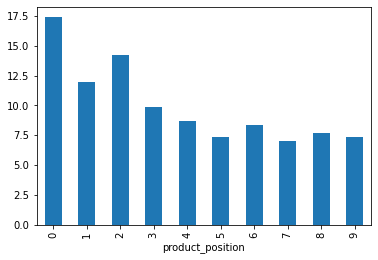

In [41]:
(rec_prod_pv.groupby("product_position").size()*100/len(rec_prod_pv)).plot(kind="bar")
plt.show()

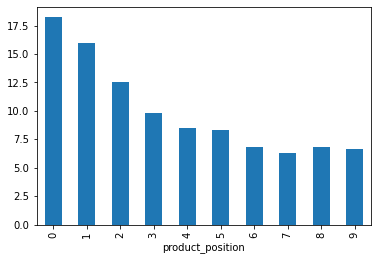

In [42]:
(rec_prod_pvc.groupby("product_position").size()*100/len(rec_prod_pvc)).plot(kind="bar")
plt.show()